Two boxes $W$ and $B$ are given. Box $W$ contains 95 white balls and 5 black balls. Box $B$ has 90 black and 10 white balls. One box is randomly selected and then one ball is randomly selected from the selected box.

Write a program that calculates the conditional probability (theoretically, as well as statistically - generate a large number of experiments) that a randomly selected ball belongs to box $W$ (event $A$) given that it is known to be white ball (event B).



$P(A|B) = \dfrac{P(A)P(B|A)}{P(B)} $ The probability of event A given B

$P(A) = \dfrac{1}{2}=0.5$ A priori probability of event A

$P(B) = \dfrac{1}{2} ⋅ \dfrac{95}{100} + \dfrac{1}{2} \cdot \dfrac{10}{100}= 0.525$ The probability of event B

$P(BA) = P(A)P(B|A) = \dfrac{1}{2} ⋅ \dfrac{95}{100} = 0.475$ Conditional probabiluty

$P(A|B) = \dfrac{P(A)P(B|A))}{P(B)}= \dfrac{0.475}{0.525} = 0.905 $

In [1]:
# Probability calculation
P_white_W = 95/100  # The probability of drawing a white ball from box W
P_black_W = 5/100   # The probability of drawing a black ball from box W


P_white_B = 10/100  # The probability of drawing a white ball from box B
P_black_B = 90/100  # The probability of drawing a black ball from box B

P_W = 1/2          # Probability of choosing box W
P_B = 1/2          # Probability of choosing box B

# Total probability of drawing a white ball
P_white = P_white_W * P_W + P_white_B * P_B

# Bayes' rule for calculating the probability of drawing from box W given that a white ball is drawn
P_W_white = (P_white_W * P_W) / P_white

print("Probability of drawing from box W given that a white ball is drawn:", P_W_white)

Probability of drawing from box W given that a white ball is drawn: 0.9047619047619047


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
boxes = ['W','B']
box_W = ['white_ball', 'black_ball']
box_B = ['white_ball', 'black_ball']

In [4]:
# The code below performs a simulation in which you randomly select a box ('W' or 'B')
# and then randomly draw a ball from the selected box in each of the N trials.

N = 10000
P_favorable = []
favorable = 0 # white ball drawn from box W
number_of_white_balls = 0
for i in range(1, N+1):
  box_index = np.random.choice(2, size=1)
  selected_box = boxes[box_index[0]]

  if selected_box == 'W': # if box W
    ball_index = np.random.choice(2, size=1, p=[P_white_W, P_black_W])
    drawn_ball = box_W[ball_index[0]]

  else: # if box B
    ball_index = np.random.choice(2, size=1, p=[P_white_B, P_black_B])
    drawn_ball = box_B[ball_index[0]]

  if drawn_ball  == 'white_ball':
    number_of_white_balls += 1
    if selected_box == 'W':
      favorable += 1

  if number_of_white_balls == 0:
    # Handle division by zero by setting the probability to a default value (0.0)
    probability = 0.0
  else:
    probability = favorable / number_of_white_balls

  P_favorable.append(probability)

P_favorable[-1]

0.9050398910293832

(0.0, 1.0)

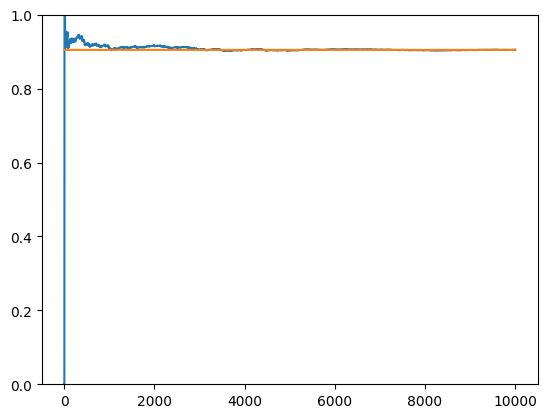

In [5]:
plt.plot(np.arange(1, N+1), P_favorable)   # Statistical (empirical) probability
plt.plot(range(0, N), [P_W_white] * N);    # Theoretical probability
plt.ylim(0,1)                              # The lower and upper limits of the y-axis.